### Step 1 — Set up imports

In [49]:
import numpy as np 
import math 
import matplotlib.pyplot as plt 
from collections import Counter 

### Step 2 — Generate binary source X 
Generate a random binary sequence (0/1) of length n. 

In [46]:
n = 100000 
rng = np.random.default_rng(0) 
X = rng.integers(0, 2, size=n)

### Step 3 — Simulate noisy channel 
Pass X through a Binary Symmetric Channel (BSC) with error probability e. 

In [41]:
def bsc_channel(X, e=0.1, rng=None): 
    rng = np.random.default_rng(rng) 
    noise = (rng.random(len(X)) < e).astype(int)
    Y = X ^ noise 
    return Y 
 
Y = bsc_channel(X, e=0.1, rng=1)

### Step 4 — Build joint distribution p(x,y) 

In [48]:
def joint_pmf(xs, ys): 
    assert len(xs) == len(ys) 
    n = len(xs) 
    pairs = list(zip(xs, ys)) 
    counts = Counter(pairs) 
    keys = sorted(counts.keys()) 
    ps = np.array([counts[k]/n for k in keys], float) 
    return keys, ps 
 
keys, pxy = joint_pmf(X, Y) 
print("Joint distribution:", dict(zip(keys, pxy))) 

Joint distribution: {(np.int64(0), np.int64(0)): np.float64(0.44964), (np.int64(0), np.int64(1)): np.float64(0.05078), (np.int64(1), np.int64(0)): np.float64(0.04909), (np.int64(1), np.int64(1)): np.float64(0.45049)}


### Step 5 — Compute mutual information 

In [12]:
def marginal_from_joint(keys, ps, axis=0): 
    vals = sorted(set(k[axis] for k in keys)) 
    pm = [] 
    for v in vals: 
        p = ps[[i for i,k in enumerate(keys) if k[axis]==v]].sum() 
        pm.append(p) 
    return dict(zip(vals, pm)) 
 
def mutual_information(keys, ps): 
    px = marginal_from_joint(keys, ps, axis=0) 
    py = marginal_from_joint(keys, ps, axis=1) 
    I = 0.0 
    for (x,y), pxy in zip(keys, ps): 
        if pxy > 0: 
            I += pxy * math.log2(pxy / (px[x] * py[y])) 
    return I 
 
I_est = mutual_information(keys, pxy) 
print(f"Estimated I(X;Y) at e=0.1: {I_est:.4f} bits") 

Estimated I(X;Y) at e=0.1: 0.5314 bits


### Step 6 — Sweep noise probability and plot 

Text(0, 0.5, 'Mutual Information I(X;Y) [bits]')

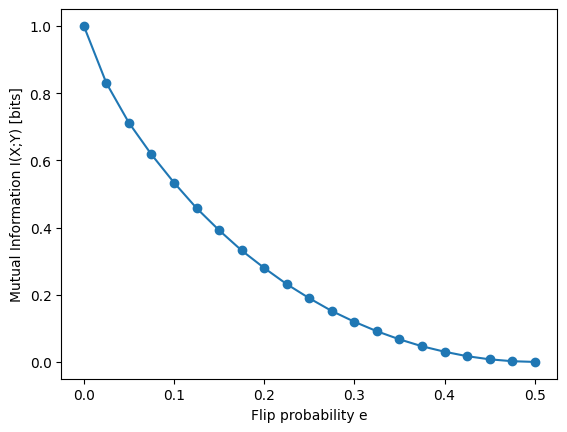

In [13]:
es = np.linspace(0, 0.5, 21) 
Is = [] 
 
for e in es: 
    Y = bsc_channel(X, e=e, rng=42) 
    keys, pxy = joint_pmf(X, Y) 
    I = mutual_information(keys, pxy) 
    Is.append(I) 
 
plt.plot(es, Is, marker='o') 
plt.xlabel("Flip probability e") 
plt.ylabel("Mutual Information I(X;Y) [bits]") 